In [1]:
import pandas as pd
import sqlalchemy as sql
from sqlalchemy import create_engine
import pymysql as mysql
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
from networkx.algorithms import approximation as approx
import pydot

In [3]:
areaCdf = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/areaC_matrix_2018.csv")
areaCdf

,ID,FROM_ID,TO_ID,TYPE
0,312,2009,2008,Cuts
1,313,2009,2010,Cuts
2,314,2009,2011,Cuts
3,315,2009,2035,Cuts
4,316,2009,2038,Cuts
5,317,2009,2048,Cuts
6,318,2009,2014,Cuts
7,319,2022,1,Cuts
8,320,2044,2023,Cuts
9,418,2029,2026,Cuts


In [4]:
# Build your graph
G=nx.from_pandas_edgelist(areaCdf,'FROM_ID', 'TO_ID','TYPE')

In [5]:
print(nx.info(G))
print(nx.is_connected(G))
components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Name: 
Type: Graph
Number of nodes: 976
Number of edges: 1694
Average degree:   3.4713
False
Network diameter of largest component: 21


In [6]:
paths = nx.all_simple_paths(G, 2009,2023,cutoff=4)

In [7]:
for path in nx.all_simple_paths(G, source=2009, target=2023,cutoff=5):
     print(path)

[2009, 2008, 2021, 2013, 2024, 2023]
[2009, 2008, 2048, 2072, 2024, 2023]
[2009, 2008, 2048, 2072, 2003, 2023]
[2009, 2011, 2033, 2000, 2003, 2023]
[2009, 2011, 2033, 2205, 2055, 2023]
[2009, 2035, 2016, 2000, 2003, 2023]
[2009, 2035, 2006, 2000, 2003, 2023]
[2009, 2035, 2074, 2104, 2055, 2023]
[2009, 2035, 2074, 2054, 2055, 2023]
[2009, 2035, 2147, 2184, 2055, 2023]
[2009, 2035, 2147, 2205, 2055, 2023]
[2009, 2038, 2004, 2000, 2003, 2023]
[2009, 2038, 2004, 2068, 2055, 2023]
[2009, 2038, 2067, 2060, 2024, 2023]
[2009, 2038, 2072, 2095, 2120, 2023]
[2009, 2038, 2072, 2024, 2023]
[2009, 2038, 2072, 2003, 2023]
[2009, 2038, 2072, 2070, 2122, 2023]
[2009, 2038, 2072, 2070, 2126, 2023]
[2009, 2038, 2072, 2070, 2024, 2023]
[2009, 2038, 2072, 2070, 2120, 2023]
[2009, 2038, 2111, 2104, 2055, 2023]
[2009, 2038, 2111, 2054, 2055, 2023]
[2009, 2038, 2017, 2055, 2023]
[2009, 2038, 2017, 2054, 2055, 2023]
[2009, 2038, 2048, 2072, 2024, 2023]
[2009, 2038, 2048, 2072, 2003, 2023]
[2009, 2038, 2046, 

In [8]:
for path in nx.all_shortest_paths(G, source=2115, target=2161):
     print(path)

[2115, 2075, 2081, 2095, 1, 2161]
[2115, 2082, 2081, 2095, 1, 2161]
[2115, 2093, 2081, 2095, 1, 2161]
[2115, 2075, 2114, 2095, 1, 2161]
[2115, 2093, 2114, 2095, 1, 2161]
[2115, 2075, 2081, 2139, 1, 2161]
[2115, 2082, 2081, 2139, 1, 2161]
[2115, 2093, 2081, 2139, 1, 2161]
[2115, 2093, 2131, 2139, 1, 2161]
[2115, 2080, 2131, 2139, 1, 2161]
[2115, 2080, 2136, 2139, 1, 2161]
[2115, 2075, 2081, 2095, 2162, 2161]
[2115, 2082, 2081, 2095, 2162, 2161]
[2115, 2093, 2081, 2095, 2162, 2161]
[2115, 2075, 2114, 2095, 2162, 2161]
[2115, 2093, 2114, 2095, 2162, 2161]


In [9]:
A = nx.all_shortest_paths(G, source=2115, target=2162)
A

<generator object all_shortest_paths at 0x000000000B593620>

{2081: Text(-0.296398,-0.0224842,'2081'),
 2115: Text(-0.29565,-0.0767266,'2115'),
 2095: Text(-0.310602,0.0425216,'2095'),
 2162: Text(-0.374675,0.0290211,'2162'),
 2075: Text(-0.285066,-0.0425271,'2075')}

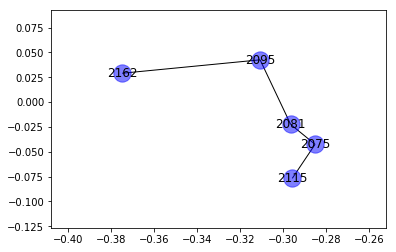

In [11]:
B = nx.dijkstra_path(G,source=2115, target=2162)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, nodelist = B, node_color = 'b', alpha = 0.5)
h = G.subgraph(B)
nx.draw_networkx_edges(G,pos=pos, edgelist = h.edges())
nx.draw_networkx_labels(h, pos=pos, font_size = 12)

{2656: Text(0.101071,-0.000721509,'2656'),
 2465: Text(-0.0475652,-0.10141,'2465'),
 2466: Text(0.0159828,-0.109626,'2466'),
 2851: Text(0.382916,-0.0921823,'2851'),
 2853: Text(0.154679,-0.0546265,'2853'),
 2760: Text(0.148246,0.00617923,'2760'),
 2475: Text(0.0134551,-0.0211708,'2475'),
 2476: Text(-0.0207862,-0.140029,'2476'),
 2836: Text(0.158572,0.0261163,'2836'),
 2902: Text(0.515597,-0.166087,'2902'),
 2936: Text(0.457495,-0.139436,'2936')}

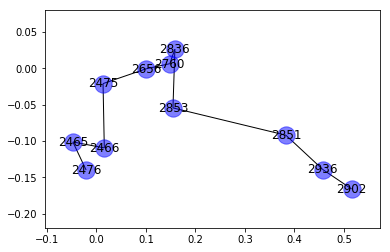

In [13]:
pos = nx.spring_layout(G)
B = nx.dijkstra_path(G,source=2476, target=2902)
nx.draw_networkx_nodes(G, pos=pos, nodelist = B, node_color = 'b', alpha = 0.5)
locC = G.subgraph(B)
nx.draw_networkx_edges(locC,pos=pos, edgelist = locC.edges())
nx.draw_networkx_labels(locC, pos=pos, font_size = 12)

{2936: Text(-0.0885882,-0.178203,'2936'),
 2851: Text(-0.010811,-0.146515,'2851'),
 2902: Text(-0.148988,-0.180731,'2902'),
 2935: Text(0.0300509,-0.233877,'2935')}

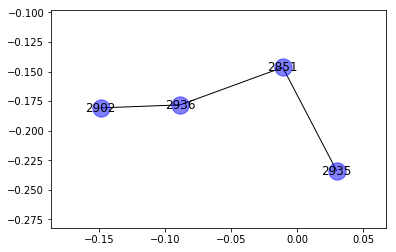

In [14]:
pos = nx.spring_layout(G)
B = nx.dijkstra_path(G,source=2935, target=2902)
nx.draw_networkx_nodes(G, pos=pos, nodelist = B, node_color = 'b', alpha = 0.5)
h = G.subgraph(B)
nx.draw_networkx_edges(G,pos=pos, edgelist = h.edges())
nx.draw_networkx_labels(h, pos=pos, font_size = 12)

In [15]:
approx.local_node_connectivity(G, source=2115, target=2161)

1

In [16]:
sorted(nx.common_neighbors(G, 2029,2030))

[2018, 2026]

In [17]:
nx.betweenness_centrality_subset(G, [2029,2115,2935], [2161,2030,2902], normalized=False, weight=None)

{2009: 0.0,
 2008: 0.0,
 2010: 0.0,
 2011: 0.0,
 2035: 0.0,
 2038: 0.0,
 2048: 0.0,
 2014: 0.0,
 2022: 0.0,
 1: 1.21875,
 2044: 0.0,
 2023: 0.0,
 2029: 0.0,
 2026: 1.9583333333333333,
 2030: 0.0,
 2027: 0.0,
 2028: 0.0,
 2046: 0.0,
 2084: 0.0,
 2086: 0.0,
 2115: 0.0,
 2075: 0.6263020833333333,
 2082: 0.5286458333333334,
 2101: 0.0,
 2093: 0.22786458333333331,
 2080: 0.1171875,
 2138: 0.0,
 2136: 0.078125,
 2139: 0.234375,
 2148: 0.0,
 2150: 0.0,
 2152: 0.0,
 2157: 0.0,
 2159: 0.0,
 2161: 0.0,
 2163: 0.0,
 2165: 0.0,
 2167: 0.0,
 2169: 0.0,
 2172: 0.0,
 2099: 0.0,
 2210: 0.0,
 2178: 0.29166666666666663,
 2188: 0.0,
 2205: 0.0,
 2191: 0.0,
 2206: 0.09375,
 2201: 1.0,
 2202: 0.625,
 2213: 0.625,
 2214: 0.0,
 2112: 0.0,
 2104: 0.0,
 2105: 0.0,
 2116: 0.0,
 2117: 0.0,
 2124: 0.0,
 2147: 0.0,
 2129: 0.0,
 2132: 0.0,
 2135: 0.0,
 2134: 0.0,
 2050: 0.0,
 2064: 0.0,
 2141: 0.0,
 2144: 0.0,
 2146: 0.0,
 2156: 0.0,
 2155: 0.0,
 2236: 0.0,
 2230: 0.0,
 2254: 0.0,
 2232: 0.0,
 2294: 0.0,
 2290: 0.0

In [18]:
J = nx.edges(G,[2029,2030])
J

EdgeDataView([(2029, 2026), (2029, 2018), (2030, 2027), (2030, 2026), (2030, 2018)])

In [19]:
nx.number_connected_components(G)
nx.info(G,2018)

'Node 2018 has the following properties:\nDegree: 9\nNeighbors: 2015 2031 2026 2027 2018 2029 2030 2028'

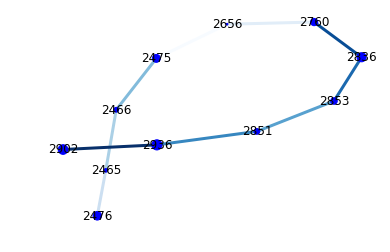

In [22]:
pos = nx.layout.spring_layout(locC)
node_sizes = [3 + 10 * i for i in range(len(locC))]
M = locC.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(locC, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(locC, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=3)

labels = nx.draw_networkx_labels(locC, pos=pos, font_size = 12)
ax = plt.gca()
ax.set_axis_off()
plt.show()